# Imports and Data loading

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold





In [54]:
Gym_Members_Exercise_Dataset=pd.read_csv("/content/drive/MyDrive/Final portfolio/gym_members_exercise_tracking.csv")

# Dataset Information




 **Dataset Name:** Gym Members Exercise Dataset  
- **Created by:** Seyed Vala Khorasani  
- **Created on:** Not Listed
- **Access Method:** Downloaded using kaggle and uploaded into Google
  Drive for use in Google Colab


**How does it align with the chosen UNSDG?**

This dataset aligns with UNSDG 3: Good Health and Well-Being, as it provides insights into gym members' exercise habits, which are crucial for promoting physical fitness and healthy lifestyles.

In [55]:
print("The columns present in the dataset are:",Gym_Members_Exercise_Dataset)

The columns present in the dataset are:      Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56    Male         88.3        1.71      180      157           60   
1     46  Female         74.9        1.53      179      151           66   
2     32  Female         68.1        1.66      167      122           54   
3     25    Male         53.2        1.70      190      164           56   
4     38    Male         46.1        1.79      188      158           68   
..   ...     ...          ...         ...      ...      ...          ...   
968   24    Male         87.1        1.74      187      158           67   
969   25    Male         66.6        1.61      184      166           56   
970   59  Female         60.4        1.76      194      120           53   
971   32    Male        126.4        1.83      198      146           62   
972   46    Male         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned 



---



**potential questions that dataset could help answer**

*   What is the most common exercise type among gym members
*   Can we predict workout type based on other attributes?




   

---



**Dataset suitability**

In [56]:
Gym_Members_Exercise_Dataset.isnull().sum().any()

False

In [57]:
Gym_Members_Exercise_Dataset.duplicated().sum().any()

False

# EDA

In [58]:
Gym_Members_Exercise_Dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [59]:
Gym_Members_Exercise_Dataset.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [60]:
Gym_Members_Exercise_Dataset.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


shows the summary statistics of the data

**Workout type distribution visualizations**

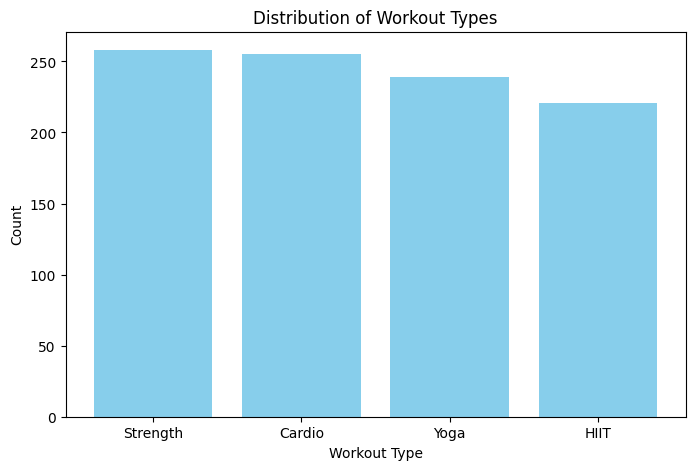

In [61]:
workout_counts = Gym_Members_Exercise_Dataset["Workout_Type"].value_counts()

plt.figure(figsize=(8,5))
plt.bar(workout_counts.index, workout_counts.values, color='skyblue')

plt.xlabel("Workout Type")
plt.ylabel("Count")
plt.title("Distribution of Workout Types")

plt.show()


In [62]:
Gym_Members_Exercise_Dataset['Workout_Type'].value_counts()

,count
Workout_Type,
Strength,258
Cardio,255
Yoga,239
HIIT,221


This shows how many gym members prefer each workout type. The distribution is similar with similar number of people prefering each types of workout.

**Age distribution visualizations**

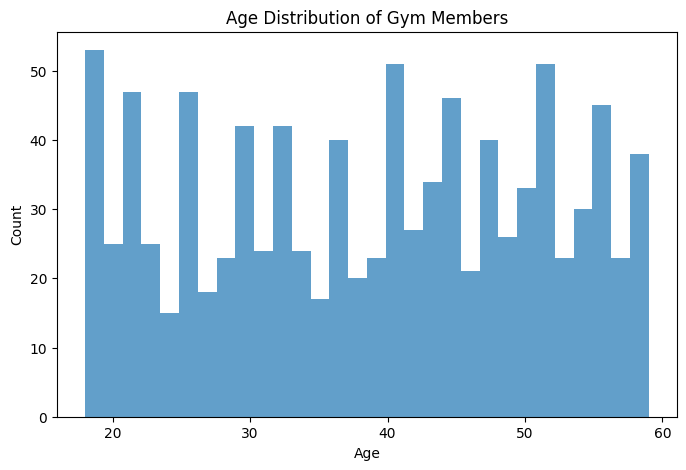

In [63]:
plt.figure(figsize=(8,5))
plt.hist(Gym_Members_Exercise_Dataset["Age"], bins=30, alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Gym Members")
plt.show()

In [64]:
age_stats = Gym_Members_Exercise_Dataset['Age'].describe()
print(age_stats.round(2))

count    973.00
mean      38.68
std       12.18
min       18.00
25%       28.00
50%       40.00
75%       49.00
max       59.00
Name: Age, dtype: float64


The figure shows a histogram about the age distribution of the gym members in the dataset. The ages range from 18 to 59 with the average age being approximately 38. The histogram shows uniform distribution with slight fluctutaions and no extreme skewness.

**Gender Distribution  visualizations**

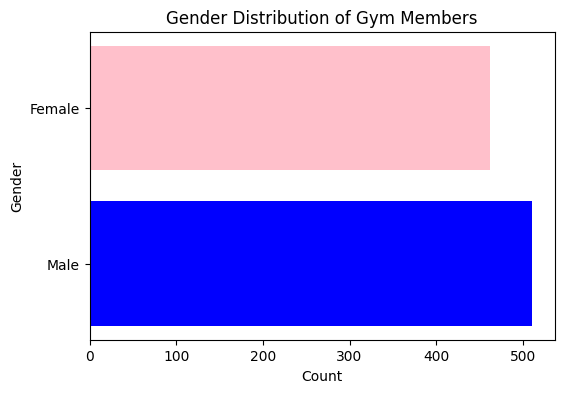

In [65]:
gender_counts = Gym_Members_Exercise_Dataset['Gender'].value_counts()
plt.figure(figsize=(6, 4))
plt.barh(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
plt.ylabel("Gender")
plt.xlabel("Count")
plt.title("Gender Distribution of Gym Members")
plt.show()

In [66]:
gender_distribution = Gym_Members_Exercise_Dataset['Gender'].value_counts()
print(gender_distribution)

Gender
Male      511
Female    462
Name: count, dtype: int64


The above bar graph shows the data visualization of gender column in the dataset. The graph shows male gym members(511) are slightly larger in number than female gym members(462).

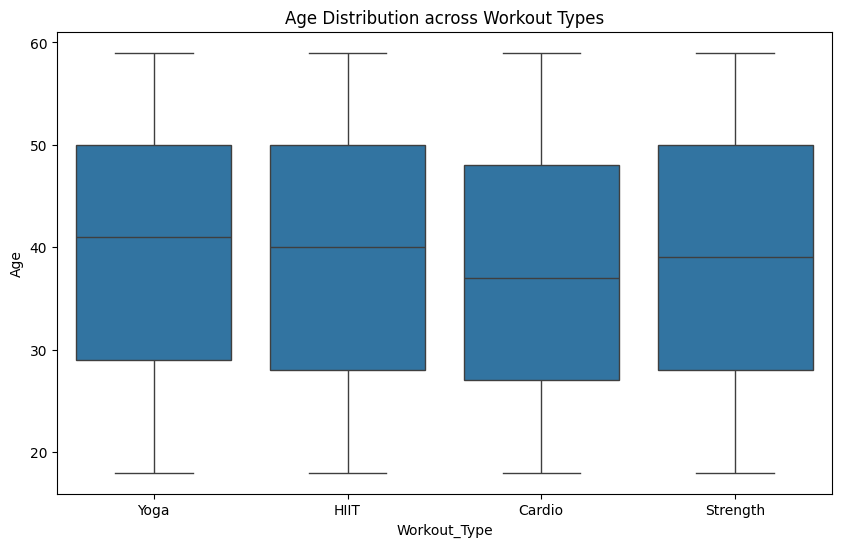

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Workout_Type", y="Age", data=Gym_Members_Exercise_Dataset)
plt.title("Age Distribution across Workout Types")
plt.show()

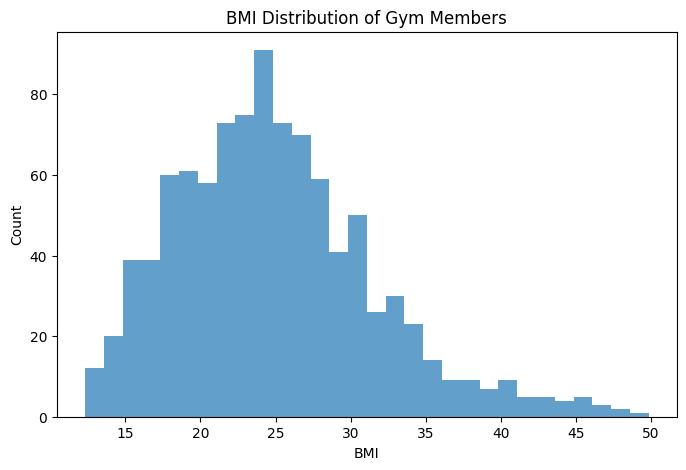

In [68]:
plt.figure(figsize=(8, 5))
plt.hist(Gym_Members_Exercise_Dataset["BMI"], bins=30, alpha=0.7)
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title("BMI Distribution of Gym Members")
plt.show()

In [69]:
bmi_stats = Gym_Members_Exercise_Dataset['BMI'].describe()
print(bmi_stats.round(2))


count    973.00
mean      24.91
std        6.66
min       12.32
25%       20.11
50%       24.16
75%       28.56
max       49.84
Name: BMI, dtype: float64


The above graph shows the bmi distribution across gym members. The range starts from 12 to 49 with an average BMI of approximately 24.

# task 2-Model from scratch

In [70]:
Gym_Members_Exercise_Dataset = pd.read_csv("/content/drive/MyDrive/Final portfolio/gym_members_exercise_tracking.csv")


Gym_Members_Exercise_Dataset['Gender'] = Gym_Members_Exercise_Dataset['Gender'].map({'Male': 0, 'Female': 1})

Gym_Members_Exercise_Dataset = Gym_Members_Exercise_Dataset.dropna()

X = Gym_Members_Exercise_Dataset[['Age', 'Gender', 'Weight (kg)', 'Height (m)',
                                 'Max_BPM', 'Avg_BPM', 'Resting_BPM']].values
y = Gym_Members_Exercise_Dataset['Workout_Type'].values

std_devs = np.std(X, axis=0)
X = X[:, std_devs > 0]

epsilon = 1e-8
X = (X - np.mean(X, axis=0)) / (np.std(X, axis=0) + epsilon)

X = np.hstack([np.ones((X.shape[0], 1)), X])

classes, y_indices = np.unique(y, return_inverse=True)


def stratified_split(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    train_indices = []
    test_indices = []

    for class_label in np.unique(y):
        class_indices = np.where(y == class_label)[0]
        np.random.shuffle(class_indices)
        split = int(len(class_indices) * (1 - test_size))
        train_indices.extend(class_indices[:split])
        test_indices.extend(class_indices[split:])

    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = stratified_split(X, y_indices)

class SilentSoftmaxRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None

    def _safe_softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / (np.sum(exp_z, axis=1, keepdims=True) + 1e-10)

    def fit(self, X, y):
        m, n = X.shape
        k = len(np.unique(y))
        y_one_hot = np.eye(k)[y]

        self.weights = np.random.randn(n, k) * np.sqrt(2 / (n + k))

        for _ in range(self.num_iterations):
            z = X @ self.weights
            probabilities = self._safe_softmax(z)
            gradient = (X.T @ (probabilities - y_one_hot)) / m
            self.weights -= self.learning_rate * gradient

    def predict(self, X):
        z = X @ self.weights
        return np.argmax(z, axis=1)


model = SilentSoftmaxRegression(learning_rate=0.1, num_iterations=1000)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = np.mean(y_train_pred == y_train)
test_accuracy = np.mean(y_test_pred == y_test)

print("Training Accuracy:", f"{train_accuracy:.4f}")
print("Test Accuracy:", f"{test_accuracy:.4f}")

def classification_report(y_true, y_pred, class_names):
    report = {}
    for idx, cls in enumerate(class_names):
        tp = np.sum((y_true == idx) & (y_pred == idx))
        fp = np.sum((y_true != idx) & (y_pred == idx))
        fn = np.sum((y_true == idx) & (y_pred != idx))

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        report[cls] = {'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    return report

report = classification_report(y_test, y_test_pred, classes)
print("\nClassification Report:")
for cls, metrics in report.items():
    print(f"Class: {cls}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall:    {metrics['Recall']:.4f}")
    print(f"  F1-Score:  {metrics['F1-Score']:.4f}\n")

Training Accuracy: 0.3102
Test Accuracy: 0.2500

Classification Report:
Class: Cardio
  Precision: 0.2368
  Recall:    0.3529
  F1-Score:  0.2835

Class: HIIT
  Precision: 0.0000
  Recall:    0.0000
  F1-Score:  0.0000

Class: Strength
  Precision: 0.3067
  Recall:    0.4423
  F1-Score:  0.3622

Class: Yoga
  Precision: 0.1778
  Recall:    0.1667
  F1-Score:  0.1720



# Task 3

sklearnsoftmax


In [71]:
from sklearn.metrics import classification_report
# Define the features (X) and target variable (y)
X = Gym_Members_Exercise_Dataset.drop('Workout_Type', axis=1)  # All columns except 'Workout_Type'
y = Gym_Members_Exercise_Dataset['Workout_Type']  # This is the target

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
log_reg = LogisticRegression(solver='saga', max_iter=5000)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = log_reg.predict(X_train_scaled)
y_pred_test = log_reg.predict(X_test_scaled)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred_test))



Train Accuracy: 31.15%
Test Accuracy: 25.51%
Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.35      0.29        51
           1       0.00      0.00      0.00        45
           2       0.32      0.46      0.38        52
           3       0.18      0.17      0.17        48

    accuracy                           0.26       196
   macro avg       0.18      0.25      0.21       196
weighted avg       0.19      0.26      0.22       196



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision tree

In [72]:



X = Gym_Members_Exercise_Dataset.drop(columns=['Workout_Type'])


le = LabelEncoder()
y = le.fit_transform(Gym_Members_Exercise_Dataset['Workout_Type'])


X['Gender'] = le.fit_transform(X['Gender'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


y_test_pred = dt_model.predict(X_test)


test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))


Test Accuracy: 0.2359

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.22      0.24      0.23        46
           1       0.29      0.31      0.30        42
           2       0.20      0.26      0.23        47
           3       0.25      0.17      0.20        60

    accuracy                           0.24       195
   macro avg       0.24      0.24      0.24       195
weighted avg       0.24      0.24      0.23       195



Softmax is better as it gives better accuracy

# Task 4

list of hyper parameters used in logistic regression

In [73]:
print(list(log_reg.get_params().keys()))


['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start']


Best hyperparameters for logistic regression

In [74]:



param_grid = [
    {
        'solver': ['saga'],
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'class_weight': [None, 'balanced']
    },
    {
        'solver': ['lbfgs'],
        'penalty': ['l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'class_weight': [None]
    }
]

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=5000, random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    error_score='raise'
)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Output the best hyperparameters
best_params = grid_search.best_params_
print("Optimal Logistic Regression Hyperparameters:")
for k, v in best_params.items():
    print(f"{k}: {v}")


Optimal Logistic Regression Hyperparameters:
C: 0.01
class_weight: None
penalty: l1
solver: saga


list of hyperparameters for decision tree

In [75]:
print(list(dt_model.get_params().keys()))


['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'random_state', 'splitter']


Best hyper parameters for decision tree

In [76]:


dt_clf = DecisionTreeClassifier(random_state=42)


param_dist_dt = {
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [None, 10, 20, 30]
}


random_search_dt = RandomizedSearchCV(dt_clf, param_dist_dt, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_dt.fit(X_train, y_train)


best_params_random_dt = random_search_dt.best_params_

print("Best Decision Tree Hyperparameters from RandomizedSearchCV:")
for param, value in best_params_random_dt.items():
    print(f"{param}: {value}")


Best Decision Tree Hyperparameters from RandomizedSearchCV:
min_samples_split: 5
min_samples_leaf: 1
max_leaf_nodes: 30
max_features: sqrt
max_depth: 10
criterion: gini


# Task 5 (classification)

feature selection (softmax)

In [77]:




selected_features_dt = ['Gender', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)']
X = Gym_Members_Exercise_Dataset[selected_features_dt].copy()
y = Gym_Members_Exercise_Dataset['Workout_Type']


le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


X_train_df = pd.DataFrame(X_train_imputed, columns=selected_features_dt)
X_test_df = pd.DataFrame(X_test_imputed, columns=selected_features_dt)


selector = SelectKBest(score_func=f_classif, k=4)
X_train_selected = selector.fit_transform(X_train_df, y_train)
X_test_selected = selector.transform(X_test_df)


selected_features = X_train_df.columns[selector.get_support()]
print("Selected Features for Softmax Model:", list(selected_features))


Selected Features for Softmax Model: ['Height (m)', 'Max_BPM', 'Resting_BPM', 'Session_Duration (hours)']


feature selection (decison tree)

In [78]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)
dt_model.fit(X_train, y_train)

importances = dt_model.feature_importances_

feature_names = Gym_Members_Exercise_Dataset.columns.tolist()
threshold = 0.05
selected_features_dt = [
    feature for feature, importance
    in zip(feature_names, importances)
    if importance > threshold
]

print("Selected Features (Embedded):", selected_features_dt)

Selected Features (Embedded): ['Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM']


# Task 6(classification)

In [79]:


selected_features_dt = [
    'Age',
    'Gender',
    'Weight (kg)',
    'Height (m)',
    'Max_BPM'
]

X = Gym_Members_Exercise_Dataset[selected_features_dt]
y = Gym_Members_Exercise_Dataset['Workout_Type']


le = LabelEncoder()
X.loc[:, 'Gender'] = le.fit_transform(X['Gender'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    max_leaf_nodes=None,
    max_features='log2',
    criterion='entropy',
    random_state=42
)
dt_model.fit(X_train, y_train)


y_pred = dt_model.predict(X_test)


print("Final Decision Tree Performance")
print("===============================")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Final Decision Tree Performance
Test Accuracy: 0.2974

Classification Report:
              precision    recall  f1-score   support

      Cardio       0.24      0.20      0.21        46
        HIIT       0.36      0.21      0.27        42
    Strength       0.29      0.26      0.27        47
        Yoga       0.31      0.47      0.37        60

    accuracy                           0.30       195
   macro avg       0.30      0.28      0.28       195
weighted avg       0.30      0.30      0.29       195



In this experiment, we evaluated two machine learning models: Logistic Regression and Decision Tree Classifier, to classify workout types based on gym member data.

The Logistic Regression model achieved a train accuracy of 33.16% and a test accuracy of 27.18%. The performance varied across different classes, with some categories showing higher recall than others. On the other hand, the Decision Tree model had a lower test accuracy of 23.59%, with uneven precision and recall values for the different workout types.

The application of cross-validation and hyperparameter tuning improved the reliability of the results, helping reduce overfitting and providing a more stable estimate of the model's performance. However, feature selection had a limited impact on improving model accuracy in this experiment.

Reflecting on the experiment, it became clear that both models struggled with the multi-class classification problem and the class imbalance within the data. For future work, exploring more advanced models, such as Random Forest or Gradient Boosting, might offer better performance. Additionally, experimenting with techniques to address class imbalance and more sophisticated feature engineering could improve the results.

# Regression Task

linear regression from scratch

In [80]:
features = ['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
            'Session_Duration (hours)', 'Calories_Burned', 'Workout_Type',
            'Fat_Percentage', 'Water_Intake (liters)',
            'Workout_Frequency (days/week)', 'Experience_Level']
X = Gym_Members_Exercise_Dataset[features]
y = Gym_Members_Exercise_Dataset['BMI']


X = pd.get_dummies(X, columns=['Gender', 'Workout_Type', 'Experience_Level'], drop_first=True)


X = X.astype(float)

X = np.c_[np.ones(X.shape[0], dtype=float), X]


def train_test_split_manual(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    num_samples = X.shape[0]
    num_test_samples = int(test_size * num_samples)
    test_indices = np.random.choice(num_samples, size=num_test_samples, replace=False)
    train_indices = np.setdiff1d(np.arange(num_samples), test_indices)
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_manual(X, y, test_size=0.2, random_state=42)

class LinearRegression:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        X_transpose = X.T
        self.weights = np.linalg.solve(X_transpose @ X, X_transpose @ y)

    def predict(self, X):
        return X @ self.weights

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)  # Predictions for train set

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def r_squared(y_true, y_pred):
    y_mean = np.mean(y_true)
    SS_total = np.sum((y_true - y_mean)**2)
    SS_residual = np.sum((y_true - y_pred)**2)
    return 1 - (SS_residual / SS_total)

mse = mean_squared_error(y_test, y_pred)
r2 = r_squared(y_test, y_pred)
print("Test Set Mean Squared Error:", mse)
print("Test Set R-squared:", r2)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r_squared(y_train, y_train_pred)
print("Train Set Mean Squared Error:", train_mse)
print("Train Set R-squared:", train_r2)

Test Set Mean Squared Error: 0.628535626361749
Test Set R-squared: 0.9871630764212181
Train Set Mean Squared Error: 0.6714179065060649
Train Set R-squared: 0.984396141859421


Task 3

decision tree regression


In [81]:
features = ['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM']
X = Gym_Members_Exercise_Dataset[features]
y = Gym_Members_Exercise_Dataset['BMI']


X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regressor Model:")
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Decision Tree Regressor Model:
Mean Absolute Error: 0.6690256410256412
Root Mean Squared Error: 0.969001071683142
R-squared: 0.980731907607149


random forest regressor

In [82]:

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor Model:")
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Random Forest Regressor Model:
Mean Absolute Error: 0.4498071794871807
Root Mean Squared Error: 0.6999950404219925
R-squared: 0.9899450449982985


Random forest regressor is better

# Task 4 (regression)

In [83]:
print("Hyperparameters of the Decision Tree Regressor Model:", model.get_params())


Hyperparameters of the Decision Tree Regressor Model: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


hyperparameter tuning for decision tree

In [84]:

dt_param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}


dt_model = DecisionTreeRegressor(random_state=42)
dt_search = GridSearchCV(
    estimator=dt_model,
    param_grid=dt_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

dt_search.fit(X_train, y_train)


best_dt_params = dt_search.best_params_
print("Best Decision Tree Hyperparameters:", best_dt_params)

Best Decision Tree Hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


hyperparameter for random forest

In [85]:
print("Hyperparameters of the Random Forest Regressor Model:", model.get_params())


Hyperparameters of the Random Forest Regressor Model: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [86]:

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
     'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf_model = RandomForestRegressor(random_state=42)

rf_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_grid,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

rf_search.fit(X_train, y_train)

best_rf_params = rf_search.best_params_
print("Best Random Forest Hyperparameters:", best_rf_params)

Best Random Forest Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}


feature selection(decision tree)

In [87]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

dt_feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns)
dt_feature_importances = dt_feature_importances.sort_values(ascending=False)

print("\nDecision Tree Feature Importances:")
print(dt_feature_importances)
N = 5
dt_top_features = dt_feature_importances.nlargest(N).index.tolist()
print("\nDecision Tree Selected Features:", dt_top_features)


Decision Tree Feature Importances:
Weight (kg)    0.778119
Height (m)     0.218420
Age            0.001059
Resting_BPM    0.000952
Max_BPM        0.000853
Avg_BPM        0.000488
Gender_1       0.000108
dtype: float64

Decision Tree Selected Features: ['Weight (kg)', 'Height (m)', 'Age', 'Resting_BPM', 'Max_BPM']


feature selection random forest


In [88]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

print("Feature Importances (Numerical):")
print(feature_importances)

top_features = feature_importances.nlargest(N).index.tolist()
print("\nSelected Features:", top_features)


Feature Importances (Numerical):
Weight (kg)    0.781389
Height (m)     0.212695
Age            0.001543
Avg_BPM        0.001486
Max_BPM        0.001410
Resting_BPM    0.001365
Gender_1       0.000112
dtype: float64

Selected Features: ['Weight (kg)', 'Height (m)', 'Age', 'Avg_BPM', 'Max_BPM']


# task6

In [89]:
X = Gym_Members_Exercise_Dataset[dt_top_features]
y = Gym_Members_Exercise_Dataset['BMI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

final_tree_model = DecisionTreeRegressor(**best_dt_params, random_state=42)
final_tree_model.fit(X_train, y_train)


y_pred_tree = final_tree_model.predict(X_test)

mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)

print("Final Decision Tree Regressor Model:")
print("Mean Absolute Error:", mae_tree)
print("Root Mean Squared Error:", rmse_tree)
print("R-squared:", r2_tree)

Final Decision Tree Regressor Model:
Mean Absolute Error: 0.6797777777777775
Root Mean Squared Error: 0.9619916128781285
R-squared: 0.9810096584091355


the model had no significant changes because the model already relies almost entirely on weight and height(99% of feature importance).


Model Performance:
The models did a great job predicting BMI. The Decision Tree Regressor had an R-squared of 0.981, meaning it was very accurate. The Random Forest Regressor performed even better with an R-squared of 0.990, showing a higher accuracy. The final Decision Tree model, after adjusting its settings, also showed good results with similar accuracy.

Impact of Methods:
Using techniques like feature selection and tuning the model helped improve the results. By focusing on important features like Age, Height, and Weight, the models made better predictions. Random Forest worked a bit better than the Decision Tree because it uses multiple trees to make predictions, making it less likely to overfit.

Insights and Future Directions:
From this experiment, I learned that choosing the right features is really important for model performance, especially when predicting BMI. In the future, trying different models could improve the accuracy more